In [13]:
import os
import pandas as pd
import geopandas as gpd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

- Extract data from a csv to build a geopandas dataframe
- do more customizations
- go over strategies to streamline code

In [14]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [15]:
# Import states data
fp = os.path.join('data',"tiger_2022_us_state",'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify
states.columns = states.columns.str.lower()


states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


# CSV to geopandas dataframe
geopandas doesnt have a way to extract the geometry column from the csv. 
Use the long and lat

In [16]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

With the geometry column and CRS, we can plot our dataset.

<Axes: >

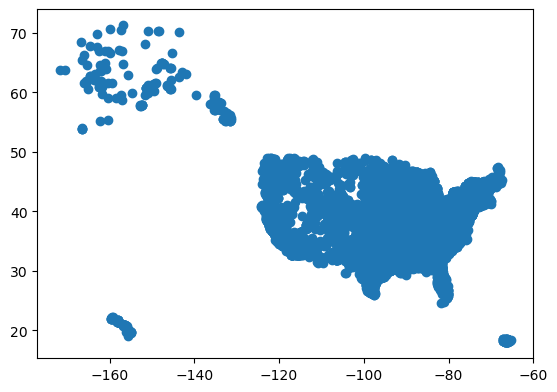

In [17]:
power_plants.plot()

# f-strings

So far, we have printed variables using string concatenation inside the print() function. This means that we write commas between every string and variable we want to print, and then the print() function concatenates these into a single string. For example:

In [18]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way of mixing strings and variables in print statements is by creating an **f-string** which stands for “formatted string”. The simplest syntax for an f-string is:

`f"some text {replace}"`

where replace can be a variable, an expression, or a function or method call. For example

In [19]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


One of the advantages of using f-strings is that they offer customization for formatting the output:

In [20]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


obtain some preliminary geospatial information about the states geodataframe:

EPSG:4269


<Axes: >

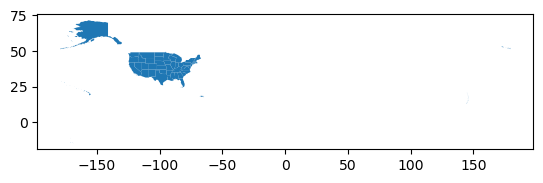

In [21]:
print(states.crs)
states.plot()

`for` **loops**

It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. We start by checking the data type of the region, division, and statefp columns:

In [22]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols: print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`assert`
Next, we update the data type of the code columns to be integers. This time, we check the data type of the column using the is_numeric_dtype() function inside an assert statement:

In [23]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])  # Check conversion

In [24]:
# Does nothing if statement is True
assert 2+2 == 4

# Raises an error if statement is False
assert 2+2 == 3

AssertionError: 

# Data  Selection
For this lesson, we want to use only the contiguous states. As seen in the plot, the data covers a bigger extension.

#### Check-in
- What are the unique values for region, division, or state codes in the data?
- Which codes should should we select to keep only states in the contiguous US?

In [ ]:
# Update code columns into integers

print(states['region'].unique())
print(states.statefp.unique())

Remove region 9 or division 0.
Hawaii and Alaska have codes 2 and 15.

The `~` tilde symbol is used in Python to negate a statement. So the previous line could be read as “the values in df’s column which are not in the list [val1, val2, val3].”

In [ ]:
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
contiguous.plot()

## Check-in
Select the data in the `power_plants` data frame for the contiguous US states

In [ ]:
power_plants.state.unique() 

In [ ]:
power_plants = power_plants[~power_plants.state.isin(['Hawaii','Puerto Rico','Alaska'])]

# Plotting

In [ ]:
contiguous.crs == power_plants.crs

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource', # Used to color each point
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

# for with zip
Often, we need to iterate simultaneously over two lists (or other iterables). The zip() function in Python allows you to combine two or more lists (or other iterables) so that you can iterate over their elements in pairs. When used with a for loop, it lets you process elements from each list together, like this example:


In [ ]:
numbers = [1, 2, 3]
for num in numbers:
    print(num)

print('\n')  # Blank line

# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

Let’s see a practical application of for loops and zip() with matplotlib subplots. A common situation when code gets repeated is when creating subplots. For example:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f'This is axis {i}')

plt.show()

- Select the power plants in California in a variable named ca_power_plants.

- Create a list named top_sources with California’s top 3 electric primary sources.

- Isolate the California state boundary in a variable named ca_boundary.

In [25]:
# Select power plants in CA
ca_power_plants = power_plants[power_plants.state.isin(['California'])]

In [26]:
# List of top sources 
top_sources = ['solar','natural gas','hydroelectric']

In [27]:
# CA boundary
ca_boundary = states[states.name == 'California']

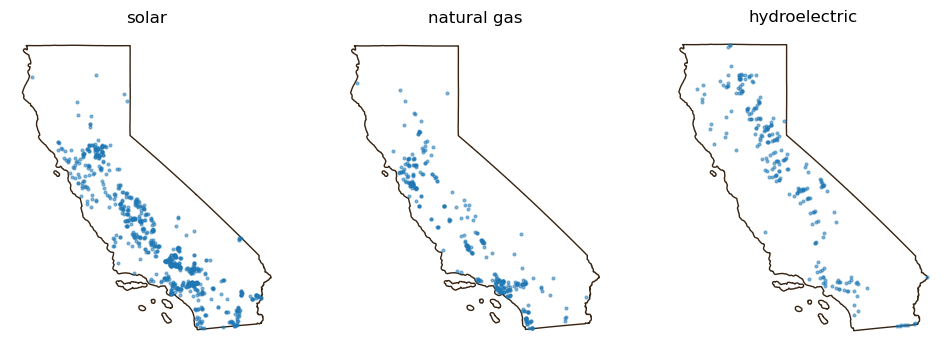

In [29]:
# Recreate plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for ax, i in zip(ax, top_sources):
    plt.title('Top 3 energy sources for electric power plants in CA')
    ax.set_title(i)
    ax.axis('off')
    
    ca_boundary.plot(ax=ax,
               color='none',
               edgecolor='#362312')
    # Add electric power plants colored by energy source
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax=ax,
                  markersize=4,
                  alpha=0.5)
                  
plt.show()